# Comida di Buteco Belo Horizonte - Melhor caminho entre dois bares

A documentação do código se encontra aqui (COLOCAR)

## Exploração do grafo com OSMNX

3834 11668


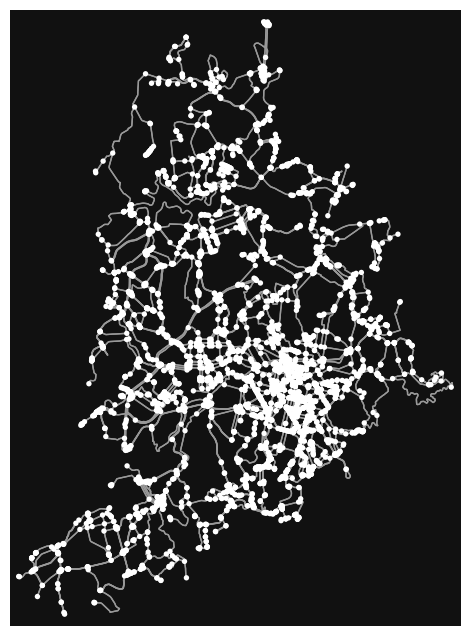

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd

custom_filter = '["highway"~"primary|secondary|tertiary"]'

G = ox.graph.graph_from_place(
    "belo horizonte - MG", custom_filter=custom_filter, network_type="walk"
)

print(len(G.nodes), len(G.edges))
ox.plot_graph(G)

In [3]:
gdf = ox.geocoder.geocode_to_gdf("belo horizonte - MG")
geometry = gdf.geometry.iloc[0]
features = ox.features.features_from_polygon(geometry, {"amenity": "bar"})
features

geometry  \
element id                                                               
node    319258499                          POINT (-43.91986 -19.93889)   
        338835579                          POINT (-43.92397 -19.93198)   
        560387242                           POINT (-43.9353 -19.91657)   
        560387248                          POINT (-43.93581 -19.91645)   
        700201180                          POINT (-43.97463 -19.84224)   
...                                                                ...   
        12803223360                        POINT (-43.96135 -19.84282)   
way     126248819    POLYGON ((-43.94166 -19.94554, -43.9415 -19.94...   
        219413190    POLYGON ((-43.97116 -19.86276, -43.97116 -19.8...   
        320045046    POLYGON ((-43.92765 -19.88625, -43.92748 -19.8...   
        1329974422   POLYGON ((-43.94288 -19.92992, -43.94279 -19.9...   

                    amenity                             name  historic  \
element id                                                               
node    319258499       bar                   Bar do Salomão       NaN   
        338835579       bar                      Villa Rizza       NaN   
        560387242       bar                              NaN       NaN   
        560387248       bar                              NaN  monument   
        700201180       bar                              NaN       NaN   
...                     ...                              ...       ...   
        12803223360     bar  Bar e Restaurante Seu Braz 1949       NaN   
way     126248819       bar                  Morrito do Mato       NaN   
        219413190       bar                              NaN       NaN   
        320045046       bar                       Druida Mix       NaN   
        1329974422      bar                           Zavino       NaN   

                          addr:city addr:country addr:housenumber  \
element id                                                          
node    319258499               NaN          NaN              NaN   
        338835579               NaN          NaN              NaN   
        560387242               NaN          NaN              NaN   
        560387248               NaN          NaN              NaN   
        700201180               NaN          NaN              NaN   
...                             ...          ...              ...   
        12803223360  Belo Horizonte          NaN             4325   
way     126248819               NaN          NaN              NaN   
        219413190               NaN          NaN              NaN   
        320045046               NaN          NaN              NaN   
        1329974422   Belo Horizonte          NaN              NaN   

                          addr:street cuisine wheelchair  ... level min_age  \
element id                                                ...                 
node    319258499                 NaN     NaN        NaN  ...   NaN     NaN   
        338835579                 NaN     NaN        NaN  ...   NaN     NaN   
        560387242                 NaN     NaN        NaN  ...   NaN     NaN   
        560387248                 NaN     NaN        NaN  ...   NaN     NaN   
        700201180                 NaN     NaN        NaN  ...   NaN     NaN   
...                               ...     ...        ...  ...   ...     ...   
        12803223360  Avenida Portugal     NaN         no  ...     1     NaN   
way     126248819                 NaN     NaN        NaN  ...   NaN     NaN   
        219413190                 NaN     NaN        NaN  ...   NaN     NaN   
        320045046                 NaN     NaN        NaN  ...   NaN     NaN   
        1329974422      Rua São Paulo     NaN        NaN  ...   NaN     NaN   

                    air_conditioning description lgbtq indoor_seating toilets  \
element id                                                                      
node    319258499                NaN         NaN

In [4]:
feature_points = features.representative_point()
nn = ox.distance.nearest_nodes(G, feature_points.x, feature_points.y)
nn

array([   33024422,    35789387,  2827403346,  2827403346,  1834632774,
        2843901301,    27564555,    33024422,    76008347,    28800979,
        2066691721,   585680695,  8917568375,  2835653986,  4270893846,
        5471850996,   335585588,    75429526,    29096253,    27591785,
          29096745,    29096745,    27563813,  1469991199,  1469991199,
          98851989,  5573749035,  8902062164,  8156857620,    75601513,
         320407457,    76009190,    29096202,    60592916,    76007160,
          76007160,    60592914,    60592912,    60592914,   320943759,
          28405057,    76481428,  2285761081,   335352453,  2827399846,
          32449511,    60592914,    41416532,    29287934,    28109270,
          35930990,    29095105,  9474391895,    33024422,    29601744,
        2902144401,    76007160,    34992666,    31736775,    61137322,
        3108083292,  8908436160,    64907484,    29850046,  1469991199,
          76481428,   320407430,    29095219,   317957889,    63

In [5]:
useful_tags = ["geometry", "name"]
for node, feature in zip(nn, features[useful_tags].to_dict(orient="records")):
    feature = {k: v for k, v in feature.items() if pd.notna(v)}
    G.nodes[node].update({"bar": feature})

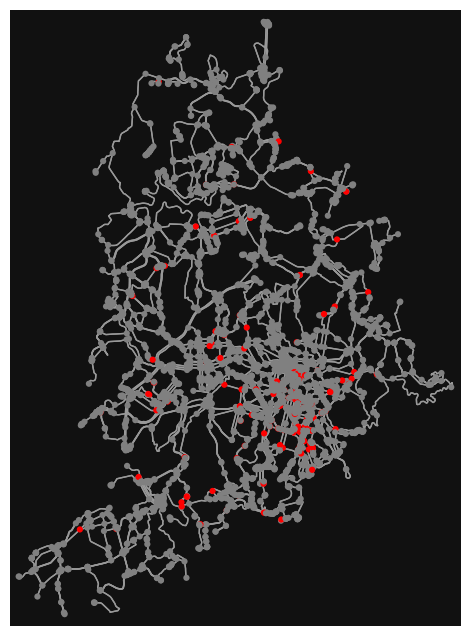

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
node_colors = ["red" if "bar" in data else "gray" for _, data in G.nodes(data=True)]
ox.plot_graph(G, node_color=node_colors, node_size=20)

In [7]:
bar_name = "Morrito do Mato"
bar_node = None

for node, data in G.nodes(data=True):
    if "bar" in data and data["bar"].get("name") == bar_name:
        bar_node = node
        break

if bar_node is not None:
    print(f"Node with bar '{bar_name}' found: {bar_node}")
else:
    print(f"No bar with the name '{bar_name}' found.")

Node with bar 'Morrito do Mato' found: 76007160


In [8]:
bar_name = "Druida Mix"
bar_node = None

for node, data in G.nodes(data=True):
    if "bar" in data and data["bar"].get("name") == bar_name:
        bar_node = node
        break

if bar_node is not None:
    print(f"Node with bar '{bar_name}' found: {bar_node}")
else:
    print(f"No bar with the name '{bar_name}' found.")

Node with bar 'Druida Mix' found: 5273004583


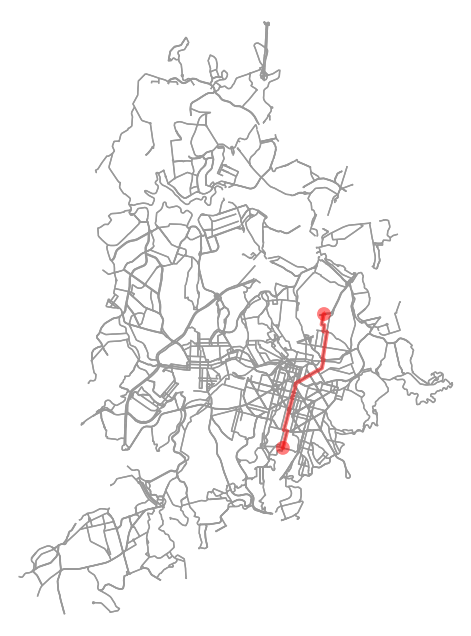

In [9]:
node_x = 76007160  # Replace with the ID of your starting node
node_y = 5273004583  # Replace with the ID of your destination node

# Calculate the shortest path based on distance
shortest_path = ox.shortest_path(G, orig=node_x, dest=node_y, weight="length")

# Plot the shortest path
fig, ax = ox.plot_graph_route(
    G, shortest_path, route_linewidth=3, node_size=0, bgcolor="white"
)

## Funções para uso do agente

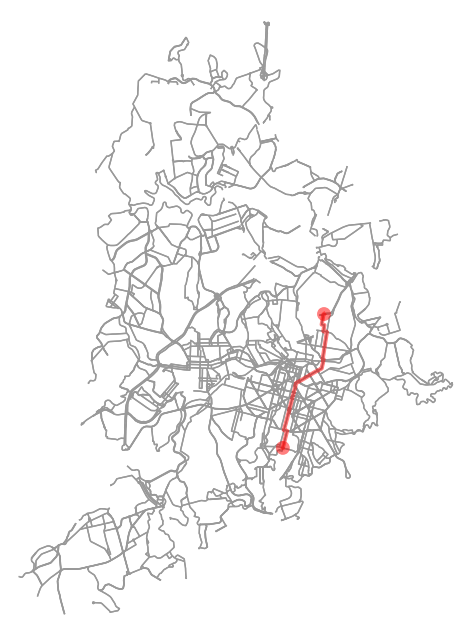

In [ ]:
import osmnx as ox
import pandas as pd
import networkx as nx

def bhBarsGraph():
    custom_filter = '["highway"~"primary|secondary|tertiary"]'
    G = ox.graph.graph_from_place(
        "belo horizonte - MG", custom_filter=custom_filter, network_type="walk"
    )

    gdf = ox.geocoder.geocode_to_gdf("belo horizonte - MG")
    geometry = gdf.geometry.iloc[0]
    features = ox.features.features_from_polygon(geometry, {"amenity": "bar"})

    feature_points = features.representative_point()
    nn = ox.distance.nearest_nodes(G, feature_points.x, feature_points.y)

    useful_tags = ["name"]
    for node, feature in zip(nn, features[useful_tags].to_dict(orient="records")):
        feature = {k: v for k, v in feature.items() if pd.notna(v)}
        G.nodes[node].update({"bar": feature})

    return G


def getNodeFromBarName(G, bar_name):
    for node, data in G.nodes(data=True):
        if "bar" in data and data["bar"].get("name") == bar_name:
            return node
    return None


def getShortestPath(G, start_bar, end_bar):
    start_node = getNodeFromBarName(G, start_bar)
    end_node = getNodeFromBarName(G, end_bar)
    if start_node is None or end_node is None:
        raise ValueError("One or both bar names not found in the graph.")

    path = ox.shortest_path(G, orig=start_node, dest=end_node, weight="length")
    path_length = sum(
        min(G.get_edge_data(u, v).values(), key=lambda d: d["length"])["length"]
        for u, v in zip(path[:-1], path[1:])
    )

    return path, path_length


graph = bhBarsGraph()
shortest_path, shortest_path_length = getShortestPath(graph, "Druida Mix", "Morrito do Mato")
fig, ax = ox.plot_graph_route(
    graph, shortest_path, route_linewidth=3, node_size=0, bgcolor="white"
)

In [11]:
def getHeuristic(G, start_bar_node, end_bar_node):
  start_x = G.nodes[start_bar_node]["x"]
  final_x = G.nodes[end_bar_node]["x"]
  start_y = G.nodes[start_bar_node]["y"]
  final_y = G.nodes[end_bar_node]["y"]
  distance = ox.distance.euclidean(start_y, start_x, final_y, final_x)
  return distance

def getAStarDistance(G, start_bar, end_bar):
  start_node = getNodeFromBarName(G, start_bar)
  end_node = getNodeFromBarName(G, end_bar)

  path = nx.astar_path(
      G,
      start_node,
      end_node,
      heuristic=lambda a, b: getHeuristic(G, a, b),
      weight='length'
  )

  path_length = sum(
      min(G.get_edge_data(u, v).values(), key=lambda d: d["length"])["length"]
      for u, v in zip(path[:-1], path[1:])
  )

  return path, path_length

astar_path, astar_len = getAStarDistance(graph, "Druida Mix", "Villa Rizza")
shortest_path, shortest_len = getShortestPath(graph, "Druida Mix", "Villa Rizza")
print(astar_len, shortest_len)


5039.75458057718 5039.75458057718


In [12]:
def getDFSPathAndLength(G, start_bar, end_bar):
  start_node = getNodeFromBarName(G, start_bar)
  end_node = getNodeFromBarName(G, end_bar)

  try:
      path = nx.dfs_tree(G, start_node)
      dfs_path = nx.shortest_path(path, start_node, end_node)
  except nx.NetworkXNoPath:
      return None, float('inf')

  path_length = sum(
      min(G.get_edge_data(u, v).values(), key=lambda d: d["length"])["length"]
      for u, v in zip(dfs_path[:-1], dfs_path[1:])
  )

  return dfs_path, path_length

dfs_path, dfs_len = getDFSPathAndLength(graph, "Druida Mix", "Villa Rizza")
print(dfs_len)

71739.07352220902


## Setup do Agente

In [49]:
from smolagents import CodeAgent, tool, LiteLLMModel

@tool
def shortest_path_to_bars(barA: str, barB: str) -> str:
    """
  Finds the shortest path between two bars in Belo Horizonte using OSM data. It tries DFS and A* algorithms
  and returns both, comparing best paths. You should only run this function once. In case of any error, return "error".

  Args:
      barA: The name of the starting bar.
      barB: The name of the destination bar.

  Returns:
      A string describing the shortest path and its total length in meters.
  """
    try:
        graph = bhBarsGraph()
        dfs_path, dfs_path_length = getDFSPathAndLength(graph, barA, barB)
        astar_path, astar_path_length = getAStarDistance(graph, barA, barB)

        if dfs_path_length < astar_path_length:
            return (
                f"Best path: DFS;({dfs_path},{dfs_path_length});A*({astar_path},{astar_path_length})"
            )
        else:
            return f"Best path: A*;({astar_path},{astar_path_length});DFS({dfs_path},{dfs_path_length})"
    except:
        return "One or both bar names not found in the graph."

model = LiteLLMModel(
  model_id='ollama_chat/gemma3'
)
agent = CodeAgent(tools=[shortest_path_to_bars], model=model, verbosity_level=0)
agent.run("Find the best path between Druida Mix and Morrito do Mato")

'Best path: A*;([5273004583, 60730912, 60730934, 8923028776, 28328657, 29173850, 2932149814, 2315416382, 2315416386, 5059489659, 8942238460, 29741086, 35789336, 2315423570, 28294403, 1915755329, 28109285, 8920367776, 28109263, 8898863284, 3540576493, 3540576293, 32449487, 29095247, 35927085, 5406180062, 36417179, 28801016, 27591804, 35968129, 35968149, 8933869822, 31899404, 27563813, 29096647, 76007160],6995.683590652072);DFS([5273004583, 60730912, 60730934, 8923028776, 964931333, 3700274712, 28328659, 27564588, 34851947, 6422603687, 3700274666, 6422603692, 3700274611, 5254923068, 29096718, 8951580406, 8927813377, 303343268, 1818397153, 297111794, 255615816, 29964242, 27558632, 60469555, 29649769, 29649782, 1469991202, 1469991204, 29649811, 27563856, 2941234101, 31563879, 31563876, 78096598, 73564056, 73563991, 73564003, 73563919, 29095244, 73563203, 73563069, 73563076, 73563085, 28384287, 2618789340, 29096517, 4270844943, 27591802, 60749858, 4634496627, 28294407, 10603799270, 10603819

## Testes

In [50]:
import random
from itertools import combinations

# Get all bars in the graph
bars = [
    data["bar"]["name"]
    for _, data in graph.nodes(data=True)
    if "bar" in data and "name" in data["bar"]
]
all_combinations = list(combinations(bars, 2))

# Randomly sample 100 pairs
sampled_combinations = random.sample(all_combinations, min(100, len(all_combinations)))
sampled_combinations_results = []
sampled_combinations_shortest_path = []

# Iterate over the selected combinations
for bar_a, bar_b in sampled_combinations:
    print(f"Checking path from {bar_a} to {bar_b}")
    result = agent.run(f"Find the best path between {bar_a} and {bar_b}")
    sampled_combinations_results.append(result)
    sampled_combinations_shortest_path.append(getShortestPath(graph, bar_a, bar_b))

# Save the results to a CSV file
df = pd.DataFrame({
    "bar_a": [pair[0] for pair in sampled_combinations],
    "bar_b": [pair[1] for pair in sampled_combinations],
    "result": sampled_combinations_results,
    "shortest_path": sampled_combinations_shortest_path
})
df.to_csv("sampled_combinations_results.csv", index=False)
df

Checking path from Lafa to Jack Rock Bar
Checking path from Bar Altas Horas to Alad'ns Bar (Frango Frito)
Checking path from Esquinão do Carrpicho to Bar do Ricardo
Checking path from Krug Bier to Carnossauro
Checking path from Butiquim da Carne to Jack Rock Bar
Checking path from Villa Rizza to Pedacinhos do Céu
Checking path from Granfinos to Bar Entre Folhas
Checking path from Stop Chopp to Auto Espeto
Checking path from Alad'ns Bar (Frango Frito) to Boi Bento
Checking path from Bar Charlotte to Boi Bento
Checking path from Peixe Boi to Chxico do Churrasco
Checking path from Balaio de Gato to Jack Rock Bar
Checking path from Social to Butiquim da Carne


Error in code parsing:
Your code snippet is invalid, because the regex pattern ```(?:py|python)?\s*\n(.*?)\n``` was not found in it.
Here is your code snippet:
This response indicates the code snippet was not executed. It simply returns "None", signifying that no output was 
generated. This likely means there was an error within the code, or the code wasn't run at all.

Make sure to include code with the correct pattern, for instance:
Thoughts: Your thoughts
Code:
```py
# Your python code here
```<end_code>
Make sure to provide correct code blobs.

Checking path from Tôatôa Butequeria to Ali Ba Bar
Checking path from Rei do Omelete to Swingers
Checking path from Bar DO DENTINHO to Bar do Jesu
Checking path from Mickey Caldo de Mocotó to Bar do Pangaré
Checking path from Mulão to Tudo na Brasa
Checking path from Duke 'n Duke to Afrodic
Checking path from Mascate to Bar do Antônio
Checking path from Bar do Geraldinho to CTI - Conheça Tudo Isso
Checking path from Zavino to CTI - Conheça Tudo Isso
Checking path from Mascate to Bolão 2
Checking path from Bar do Hugo to Oratório
Checking path from Krug Bier to Ponto dos Amigos
Checking path from Faculdade do Espeto to Bar do Geraldinho
Checking path from Bar da Cida to Ponto dos Amigos
Checking path from Tôatôa Butequeria to Corleone
Checking path from Lotus Lounge to Sátira
Checking path from Distribuidora de Bebidas to Agosto Butequim
Checking path from Balaio de Gato to Bar do John
Checking path from Boi Bento to Confraria do Malte
Checking path from Carnossauro to Bar Entre Folhas


Code execution failed at line 'print(search(query))' due to: InterpreterError: Forbidden function evaluation: 
'search' is not among the explicitly allowed tools or defined/imported in the preceding code

Code execution failed at line 'bar_a_coords = wiki(query="coordinates Bar DO DENTINHO")' due to: InterpreterError: 
Forbidden function evaluation: 'wiki' is not among the explicitly allowed tools or defined/imported in the 
preceding code

Code execution failed at line 'print(search(query))' due to: InterpreterError: Forbidden function evaluation: 
'search' is not among the explicitly allowed tools or defined/imported in the preceding code

Checking path from Bar do Pangaré to Tudo na Brasa
Checking path from Bar do Pangaré to Distribuidora Quebec
Checking path from Faculdade do Espeto to Bar do Antônio
Checking path from Social to Ponto do Espetinho 2
Checking path from Autentico's Bar to Distribuidora Quebec
Checking path from Espetinho da Esquina to Ponto dos Amigos
Checking path from Distribuidora Quebec to Tudo na Brasa
Checking path from Morrito do Mato to Ximbungo's Bar
Checking path from Boi Bento to Chxico do Churrasco
Checking path from Rei do Omelete to Ponto do Espetinho 2
Checking path from Guga's bar to Bar do Geraldinho
Checking path from Bar do Jesu to Parada Carioca
Checking path from Stop Chopp to Peixe Boi
Checking path from Churrasquinho do Buritis to Ponto do Espetinho 2
Checking path from Zavino to Granfinos
Checking path from StahlBerg Bier Haus to Afrodic


Error in code parsing:
Your code snippet is invalid, because the regex pattern ```(?:py|python)?\s*\n(.*?)\n``` was not found in it.
            Here is your code snippet:
            This output appears to be the result of a long sequence of numerical calculations, most likely related 
to a complex algorithm or simulation.  Without knowing the original code or the purpose of the calculation, it's 
impossible to interpret the specific meaning of the numbers. However, here's a breakdown of what we can observe:

*   **Large Number Range:** The numbers span a very wide range, from relatively small values to numbers in the 
hundreds of millions. This suggests a calculation involving scaling or transformations.

*   **Sequence-like Structure:** There's an apparent pattern in the numerical values, suggesting the output is the 
result of an iterative process.

*   **Possible Purpose:** Given the nature of the numbers, it's likely this output represents:
    *   **Monte Carlo Simulation:** A very sophisticated statistical simulation that models random events, which 
can produce large numbers.
    *   **Numerical Integration:** The calculations might be the results of integrating a complex mathematical 
function.
    *   **Financial Modeling:** The numbers could be part of a complex financial model that deals with interest 
rates, market fluctuations, etc.

**In conclusion,** this is most likely the result of a computationally intensive calculation that isn't directly 
understandable without knowing the context.
            Make sure to include code with the correct pattern, for instance:
            Thoughts: Your thoughts
            Code:
            ```py
            # Your python code here
            ```<end_code>
Make sure to provide correct code blobs.

Code execution failed at line 'import numpy as np' due to: InterpreterError: Import of numpy is not allowed. 
Authorized imports are: ['unicodedata', 'datetime', 'math', 'queue', 'random', 'itertools', 're', 'stat', 'time', 
'statistics', 'collections'\]

Code execution failed at line 'import matplotlib.pyplot as plt' due to: InterpreterError: Import of 
matplotlib.pyplot is not allowed. Authorized imports are: ['unicodedata', 'datetime', 'math', 'queue', 'random', 
'itertools', 're', 'stat', 'time', 'statistics', 'collections'\]

Code execution failed at line 'data = data' due to: InterpreterError: The variable `data` is not defined.

Checking path from Tonel de Pinga to Ponto do Frango
Checking path from Coreu Distribuidora to BarBambu
Checking path from Bar dos Amigos to Bar Sapucaí
Checking path from Bar Entre Folhas to Bar do Ricardo
Checking path from Tôatôa Butequeria to Alad'ns Bar (Frango Frito)
Checking path from Churrasquinho do Divino to Barção Moreira
Checking path from Bar Charlotte to Soul Jazz Burger
Checking path from Rei do Omelete to Druida Mix
Checking path from Casa Antiga to Bar do João
Checking path from Granfinos to Bar do Nono
Checking path from Bar DO DENTINHO to Bar & Rest. Bin Laden
Checking path from 222 to Lotus Lounge
Checking path from Ouro Beer to Bar do João
Checking path from Stop Chopp to Bar do Hugo
Checking path from Bar do Geraldinho to Bar do Lú
Checking path from Distribuidora de Bebidas to Lotus Lounge
Checking path from Carnossauro to Amarelim


Code execution failed at line 'path = search(query="path between Carnossauro and Amarelim")' due to: 
InterpreterError: Forbidden function evaluation: 'search' is not among the explicitly allowed tools or 
defined/imported in the preceding code

Checking path from Adega & Churrasco to pajé
Checking path from Butiquim da Carne to Bar do João
Checking path from Sabor Real to Bar do Antônio
Checking path from Oficina de Ideias to Família Adams
Checking path from Esquinão do Carrpicho to Bolão 2
Checking path from Coreu Distribuidora to CTI - Conheça Tudo Isso
Checking path from Butiquim Quintiliano to Carnossauro
Checking path from Sátira to Bar Liberdade
Checking path from Patorroco to Amarelim - Grelhados e Comida de Buteco
Checking path from Pedacinhos do Céu to Patorroco


Error in code parsing:
Your code snippet is invalid, because the regex pattern ```(?:py|python)?\s*\n(.*?)\n``` was not found in it.
            Here is your code snippet:
            Okay, I've reviewed the provided sequence of numbers:

`158466.67836693872`

This is a single numerical value. It appears to be a floating-point number, likely representing a decimal value. 
Without any context about where this number came from, it's difficult to say more about its significance. 

Do you want me to perform any operation with this number? For example:

*   Calculate its square root?
*   Add another number to it?
*   Determine its type (integer, float, etc.)?
            Make sure to include code with the correct pattern, for instance:
            Thoughts: Your thoughts
            Code:
            ```py
            # Your python code here
            ```<end_code>
Make sure to provide correct code blobs.

Checking path from Bar Charlotte to Bolão 2
Checking path from Bar do Nono to Bar dos Amigos
Checking path from Duke 'n Duke to Amarelim - Grelhados e Comida de Buteco
Checking path from Bar Entre Folhas to BarBambu
Checking path from Soul Jazz Burger to D'Gust Burguer
Checking path from Esquinão do Carrpicho to Carnossauro


,bar_a,bar_b,result,shortest_path
0,Lafa,Jack Rock Bar,"Best path: A*;([27563813, 29096647, 320407460,...","([27563813, 29096647, 320407460, 28109270, 984..."
1,Bar Altas Horas,Alad'ns Bar (Frango Frito),"Best path: A*;([29096745, 31899387, 31899385, ...","([29096745, 31899387, 31899385, 31899372, 2909..."
2,Esquinão do Carrpicho,Bar do Ricardo,"Best path: A*;([34992666, 27685679, 31890006, ...","([34992666, 27685679, 31890006, 34060233, 6181..."
3,Krug Bier,Carnossauro,"Best path: A*;([28109270, 35789357, 324383445,...","([28109270, 35789357, 324383445, 8880478848, 3..."
4,Butiquim da Carne,Jack Rock Bar,"Best path: A*;([75601513, 2960946633, 75601860...","([75601513, 2960946633, 75601860, 585706113, 2..."
...,...,...,...,...
95,Bar do Nono,Bar dos Amigos,"Best path: A*;([60592916, 60592921, 3632222921...","([60592916, 60592921, 3632222921, 3632222431, ..."
96,Duke 'n Duke,Amarelim - Grelhados e Comida de Buteco,"Best path: A*;([35789357, 8914207458, 35789358...","([35789357, 8914207458, 35789358, 9397201412, ..."
97,Bar Entre Folhas,BarBambu,"Best path: A*;([585706113, 75601860, 296094663...","([585706113, 75601860, 2960946633, 75601513, 2..."
98,Soul Jazz Burger,D'Gust Burguer,"Best path: A*;([29095808, 29096523, 29096351, ...","([29095808, 29096523, 29096351, 322058266, 158..."


Abaixo houve a limpeza do dataframe gerado.

In [ ]:
import re
import ast

df = pd.read_csv("sampled_combinations_results.csv")

def parse_result_string(input_str):
    padrao_a_star = re.compile(r"A\*;\((\[.*?\]),([\d\.]+)\)")
    padrao_dfs = re.compile(r"DFS\((\[.*?\]),([\d\.]+)\)")

    resultado_a_star = padrao_a_star.search(input_str)
    resultado_dfs = padrao_dfs.search(input_str)

    a_star_lista = []
    a_star_tempo = None
    dfs_lista = []
    dfs_tempo = None

    if resultado_a_star:
        lista_str, tempo_str = resultado_a_star.groups()
        a_star_lista = eval(lista_str)
        a_star_tempo = float(tempo_str)

    if resultado_dfs:
        lista_str, tempo_str = resultado_dfs.groups()
        dfs_lista = eval(lista_str)
        dfs_tempo = float(tempo_str)

    return a_star_lista, a_star_tempo, dfs_lista, dfs_tempo


def parse_shortest_path_string(s):
    if not isinstance(s, str):
        return None, None
    try:
        # Replace np.float64(...) with just the number inside
        cleaned = re.sub(r"np\.float64\(([\d.]+)\)", r"\1", s)
        parsed = ast.literal_eval(cleaned)
        return parsed[0], float(parsed[1])
    except Exception as e:
        print(f"Failed to parse: {e}")
        return None, None


df[["astar_path", "astar_length", "dfs_path", "dfs_length"]] = pd.DataFrame(
    list(df["result"].apply(parse_result_string)), index=df.index
)
df[["shortest_path", "shortest_path_length"]] = pd.DataFrame(
    list(df["shortest_path"].apply(parse_shortest_path_string)), index=df.index
)
df.drop(columns=["result"], inplace=True)
# Put shortest_path columns at the end
shortest_path_cols = [
    col for col in df.columns if "shortest_path" in col
]
df = df[
    [col for col in df.columns if col not in shortest_path_cols]
    + shortest_path_cols
]

# Remove rows with NaN values
df.dropna(inplace=True)
df.to_csv("sampled_combinations_clean.csv", index=False)
df

,bar_a,bar_b,astar_path,astar_length,dfs_path,dfs_length,shortest_path,shortest_path_length
0,Lafa,Jack Rock Bar,"[27563813, 29096647, 320407460, 28109270, 9846...",1223.280222,"[27563813, 31899404, 31899401, 27584878, 32040...",110222.845559,"[27563813, 29096647, 320407460, 28109270, 9846...",1223.280222
1,Bar Altas Horas,Alad'ns Bar (Frango Frito),"[29096745, 31899387, 31899385, 31899372, 29096...",1745.014498,"[29096745, 31899387, 2827321102, 2827321101, 3...",123482.389823,"[29096745, 31899387, 31899385, 31899372, 29096...",1745.014498
2,Esquinão do Carrpicho,Bar do Ricardo,"[34992666, 27685679, 31890006, 34060233, 61818...",8822.458797,"[34992666, 34992671, 34992670, 64906858, 50921...",118341.579860,"[34992666, 27685679, 31890006, 34060233, 61818...",8822.458797
3,Krug Bier,Carnossauro,"[28109270, 35789357, 324383445, 8880478848, 33...",349.539459,"[28109270, 35789357, 324383445, 35789361, 3541...",391.687592,"[28109270, 35789357, 324383445, 8880478848, 33...",349.539459
4,Butiquim da Carne,Jack Rock Bar,"[75601513, 2960946633, 75601860, 585706113, 28...",1210.505321,"[75601513, 2960946733, 2960946633, 75601860, 2...",111140.583792,"[75601513, 2960946633, 75601860, 585706113, 28...",1210.505321
...,...,...,...,...,...,...,...,...
95,Bar do Nono,Bar dos Amigos,"[60592916, 60592921, 3632222921, 3632222431, 2...",4082.317230,"[60592916, 60592921, 2823794501, 3632222921, 3...",141239.562936,"[60592916, 60592921, 3632222921, 3632222431, 2...",4082.317230
96,Duke 'n Duke,Amarelim - Grelhados e Comida de Buteco,"[35789357, 8914207458, 35789358, 9397201412, 3...",2790.752396,"[35789357, 28109270, 984671712, 28800995, 2758...",147610.893225,"[35789357, 8914207458, 35789358, 9397201412, 3...",2790.752396
97,Bar Entre Folhas,BarBambu,"[585706113, 75601860, 2960946633, 75601513, 28...",9074.090923,"[585706113, 75601860, 27589586, 59867832, 5986...",21496.281534,"[585706113, 75601860, 2960946633, 75601513, 28...",9074.090923
98,Soul Jazz Burger,D'Gust Burguer,"[29095808, 29096523, 29096351, 322058266, 1585...",19272.684124,"[29095808, 29096523, 8153716008, 29095372, 122...",42270.490417,"[29095808, 29096523, 29096351, 322058266, 1585...",19272.684124


## Análise dos Resultados

In [68]:
def compare_paths(row, col1, col2):
    val1 = row[col1]
    val2 = row[col2]
    if isinstance(val1, (int, float)) and isinstance(val2, (int, float)):
        return abs(val1 - val2) <= 5
    return val1 == val2


print(f"Número de vezes que o DFS encontrou o mesmo caminho: {df.apply(compare_paths, axis=1, args=("dfs_path", "shortest_path")).sum()}")
print(f"Número de vezes que o DFS encontrou o caminho ótimo: {df.apply(compare_paths, axis=1, args=("dfs_length", "shortest_path_length")).sum()}")
print(f"Número de vezes que o A* encontrou o mesmo caminho: {df.apply(compare_paths, axis=1, args=("astar_path", "shortest_path")).sum()}")
print(f"Número de vezes que o A* encontrou o caminho ótimo: {df.apply(compare_paths, axis=1, args=("astar_length", "shortest_path_length")).sum()}")

Número de vezes que o DFS encontrou o mesmo caminho: 0
Número de vezes que o DFS encontrou o caminho ótimo: 0
Número de vezes que o A* encontrou o mesmo caminho: 94
Número de vezes que o A* encontrou o caminho ótimo: 94


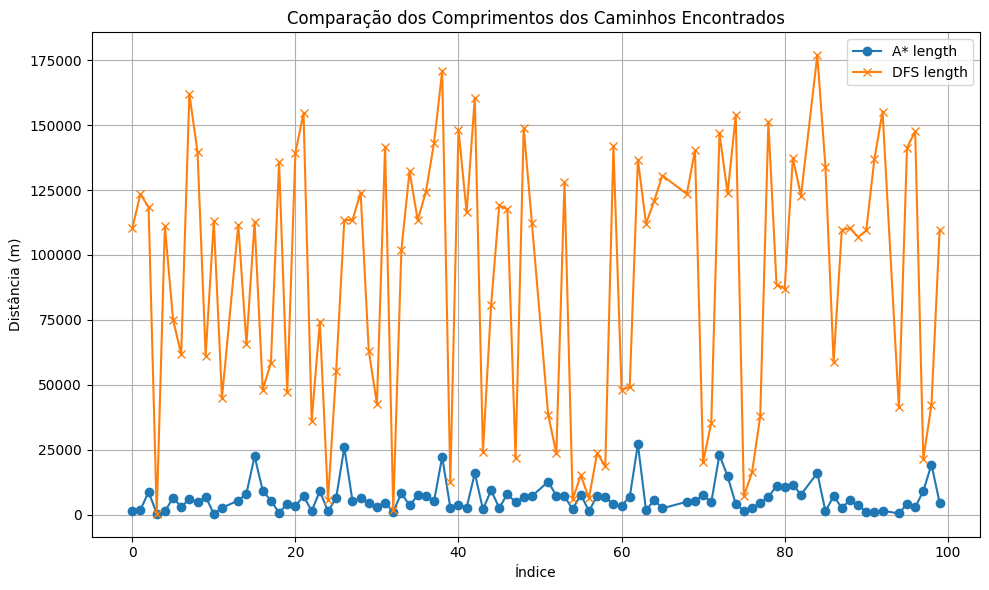

In [69]:
df_plot = df[["astar_length", "dfs_length", "shortest_path_length"]]

plt.figure(figsize=(10, 6))
plt.plot(df_plot.index, df_plot["astar_length"], label="A* length", marker="o")
plt.plot(df_plot.index, df_plot["dfs_length"], label="DFS length", marker="x")
plt.xlabel("Índice")
plt.ylabel("Distância (m)")
plt.title("Comparação dos Comprimentos dos Caminhos Encontrados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

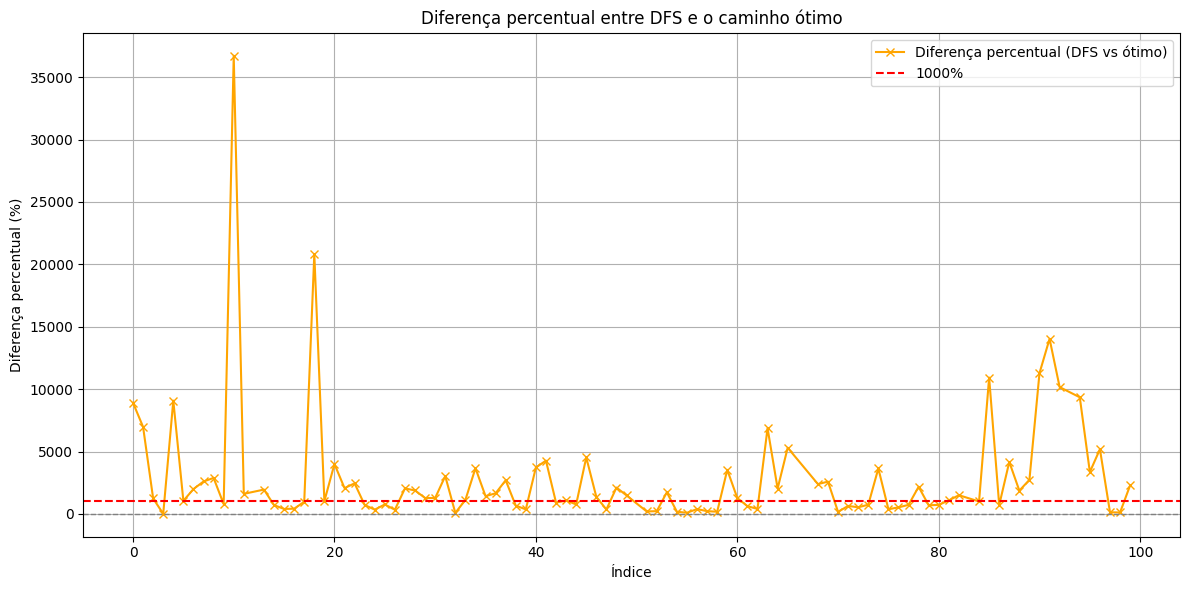

In [72]:
df["dfs_diff_percent"] = (
    100 * ((df["dfs_length"] - df["shortest_path_length"]) / df["shortest_path_length"])
)

plt.figure(figsize=(12, 6))
plt.plot(
    df["dfs_diff_percent"],
    marker="x",
    linestyle="-",
    color="orange",
    label="Diferença percentual (DFS vs ótimo)",
)
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.axhline(1000, color="red", linestyle="--", linewidth=1.5, label="1000%")
plt.xlabel("Índice")
plt.ylabel("Diferença percentual (%)")
plt.title("Diferença percentual entre DFS e o caminho ótimo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

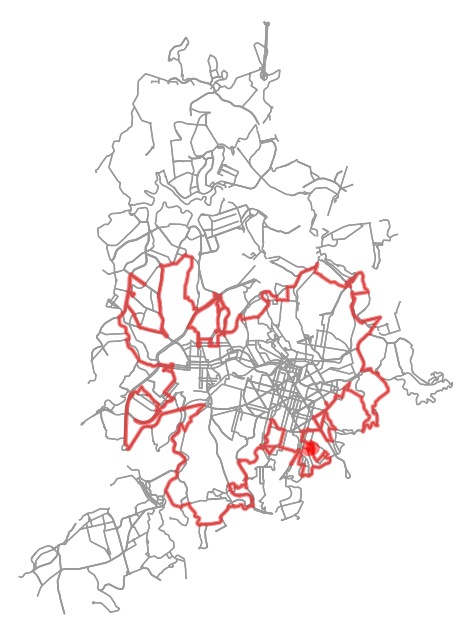

In [80]:
worst_idx = df["dfs_diff_percent"].idxmax()
worst_dfs_path = df.loc[worst_idx, "dfs_path"]

fig, ax = ox.plot_graph_route(
    graph, worst_dfs_path, route_linewidth=3, node_size=0, bgcolor="white"
)